In [308]:
import pandas as pd
import numpy as np

In [309]:
df = pd.read_csv('dom6inspector/gamedata/BaseU.csv', sep='\t')
df.head()
df = df.set_index('id')
df = df.fillna(0)

df['is_mage'] = df[['F','A','W','E','S','D','N','G','B','H']].sum(axis=1)
#df[['F','A','W','E','S','D','N','G','B','H']].loc[42]
df['wpn1'] = df['wpn1'].fillna(0)
df

name   wpn1  wpn2  wpn3  wpn4  wpn5  wpn6  wpn7  armor1   
id                                                                            
1        Logrian Slinger   17.0  22.0   0.0   0.0   0.0   0.0   0.0     6.0  \
2               Standard    6.0  21.0   0.0   0.0   0.0   0.0   0.0   116.0   
3     Serpent Cataphract  357.0   0.0   0.0   0.0   0.0   0.0   0.0   126.0   
4                Serpent  495.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   
5           Serpent Lord  357.0   0.0   0.0   0.0   0.0   0.0   0.0   126.0   
...                  ...    ...   ...   ...   ...   ...   ...   ...     ...   
4031       Carrion Titan   71.0  92.0   0.0   0.0   0.0   0.0   0.0     0.0   
4032           Worm Soul   92.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   
4033           Worm Soul   92.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   
4034        Debug Senpai  545.0   7.0   0.0   0.0   0.0   0.0   0.0    44.0   
4035         Debug Kohai    8.0   0.0   0.0   0.0   0.0   0.0   0.0    13.0   

      armor2  ...  nothrowoff  offscriptresearch  bird  decayres   
id            ...                                                  
1      118.0  ...         0.0                0.0   0.0       0.0  \
2      127.0  ...         0.0                0.0   0.0       0.0   
3       14.0  ...         0.0                0.0   0.0       0.0   
4        0.0  ...         0.0                0.0   0.0       0.0   
5       14.0  ...         0.0                0.0   0.0       0.0   
...      ...  ...         ...                ...   ...       ...   
4031     0.0  ...         0.0                0.0   0.0       0.0   
4032     0.0  ...         0.0                0.0   0.0       0.0   
4033     0.0  ...         0.0                0.0   0.0       0.0   
4034     0.0  ...         0.0                0.0   0.0       0.0   
4035   118.0  ...         0.0                0.0   0.0       0.0   

      unmountedspr  cubmother  exhaustion  glamour  end  is_mage  
id                                                                
1              0.0        0.0         0.0      0.0  0.0      0.0  
2              0.0        0.0         0.0      0.0  0.0      0.0  
3          10050.0        0.0         0.0      0.0  0.0      0.0  
4              0.0        0.0         0.0      0.0  0.0      0.0  
5          10020.0        0.0         0.0      0.0  0.0      0.0  
...            ...        ...         ...      ...  ...      ...  
4031           0.0        0.0         0.0      0.0  0.0      0.0  
4032           0.0        0.0         0.0      0.0  0.0      3.0  
4033           0.0        0.0         0.0      0.0  0.0      3.0  
4034           0.0        0.0         0.0      0.0  0.0      0.0  
4035           0.0        0.0         0.0      0.0  0.0      0.0  

[3989 rows x 531 columns]

In [310]:
# write pandas code to read weapons.csv from same dir
df_weapons = pd.read_csv('dom6inspector/gamedata/weapons.csv', sep='\t')

cleanup = ["Bronze", "Iron", "Broad", "Golden", "Ice", 'Poison Tipped', 'Cyclope', 'Long', "Stone", 'Short', 'Obsidian Club', 
           'Throwing', 'Light', 'Small', 'Composite', 'Hand', 'Pick', 'Small', 'Machaka', 'Dawn', 'Agarthan ', 'Steel']

re_str = "(^| )?(?:{})(?=( |$))?".format("|".join(cleanup))



#write a code which adds to unit it's wp1 and wpn2 names to "df" dataframe
df_weapons = df_weapons.set_index('id')
df_weapons['name_clean'] =  df_weapons['name'].str.replace(re_str, "", regex=True).str.strip()
print(len(df_weapons.columns))
print(len([0, 'None', 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0,  '']))
df_weapons[0] = df_weapons.loc[1] 
df_weapons[0,'id'] = 0
df_weapons[0, 'name'] = 'None'
df_weapons[0, 'name_clean'] = 'None'

#print(df_weapons[0])

df_plus = df.join(df_weapons, how='left', on='wpn1', rsuffix='_wpn1', )
df_plus = df_plus.join(df_weapons, how='left', on='wpn2', rsuffix='_wpn2')
df_plus.columns.to_list()
#df_plus.loc[df_plus['wpn1']]

13
13


['name',
 'wpn1',
 'wpn2',
 'wpn3',
 'wpn4',
 'wpn5',
 'wpn6',
 'wpn7',
 'armor1',
 'armor2',
 'armor3',
 'armor4',
 'rt',
 'reclimit',
 'basecost',
 'rcost',
 'size',
 'ressize',
 'hp',
 'prot',
 'mr',
 'mor',
 'str',
 'att',
 'def',
 'prec',
 'enc',
 'mapmove',
 'ap',
 'ambidextrous',
 'mounted',
 'mountmnr',
 'skilledrider',
 'reinvigoration',
 'leader',
 'undeadleader',
 'magicleader',
 'startage',
 'maxage',
 'hand',
 'bow',
 'head',
 'body',
 'foot',
 'misc',
 'crownonly',
 'pathcost',
 'startdom',
 'bonusspells',
 'F',
 'A',
 'W',
 'E',
 'S',
 'D',
 'N',
 'G',
 'B',
 'H',
 'rand1',
 'nbr1',
 'link1',
 'mask1',
 'rand2',
 'nbr2',
 'link2',
 'mask2',
 'rand3',
 'nbr3',
 'link3',
 'mask3',
 'rand4',
 'nbr4',
 'link4',
 'mask4',
 'holy',
 'inquisitor',
 'mind',
 'inanimate',
 'undead',
 'demon',
 'magicbeing',
 'stonebeing',
 'animal',
 'coldblood',
 'female',
 'forestsurvival',
 'mountainsurvival',
 'wastesurvival',
 'swampsurvival',
 'cavesurvival',
 'aquatic',
 'amphibian',
 'poo

In [311]:
df_units = pd.read_csv('dom6inspector/gamedata/fort_troop_types_by_nation.csv', sep='\t')
df_units.head()

monster_number  nation_number  end
0              50              5  NaN
1             201              5  NaN
2             199              5  NaN
3            1077              5  NaN
4            1079              5  NaN

In [312]:
human_nations = [5,6,8,9,10,11,12,13,14,16,17,18,19,22,24,25,28,29,30,31,32,33,34,
50,51,55,56,57,58,60,61,62,63,64,65,69,71,73,76,77,78,79.80,81,
95,96,98,100,101,102,103,104,105,106,107,109,110,111,114,115,116,117,119,123]

In [313]:
humans_giants = df_units.loc[df_units['nation_number'].isin(human_nations)]
unit_ids = humans_giants['monster_number'].tolist()
unit_ids

humans_giants_df = df_plus.loc[unit_ids]
humans_giants_df = humans_giants_df.loc[humans_giants_df['animal'] == False]

humans_giants_df['is_giant'] = humans_giants_df['size'] >= 5
humans_giants_df['is_human'] = humans_giants_df['size'].isin([3,4])
humans_giants_df['is_flying'] = humans_giants_df['flying'] == 1
humans_giants_df['is_undead'] = humans_giants_df['undead'] == 1
humans_giants_df['is_halfgiant'] = humans_giants_df['size'].isin([4,5]) & ~humans_giants_df['is_flying']
humans_giants_df['is_mounted'] = humans_giants_df['mountmnr'] > 0
#humans_giants_df.head().columns.to_list()
humans_giants_df['name_clean_wpn1'] = humans_giants_df['name_clean'].fillna('None')
#humans_giants_df['name_clean_wpn1']

humans_giants_df.loc[humans_giants_df['is_giant'], 'size_float'] = 1
humans_giants_df.loc[humans_giants_df['is_human'], 'size_float'] = 0
humans_giants_df.loc[humans_giants_df['is_halfgiant'], 'size_float'] = 0.5
humans_giants_df.loc[3713, 'name_clean_wpn1'] = 'None'
humans_giants_df.loc[3713, 'name_clean_wpn2'] = 'Halberd'

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
categories = humans_giants_df['name_clean_wpn2'].unique()

#categories = np.array(categories).reshape(-1, 1)

#encoder = OneHotEncoder(sparse=False)  # Use sparse=True for sparse matrix output
#one_hot = encoder.fit_transform(categories)

#print(one_hot)  # One-hot encoded array

encoder = LabelEncoder()
humans_giants_df['name_clean_wpn2_id'] = encoder.fit_transform(humans_giants_df['name_clean_wpn2'])
humans_giants_df['name_clean_wpn1_id'] = encoder.fit_transform(humans_giants_df['name_clean_wpn1'])

#print("Mapping:", dict(zip(encoder.classes_, range(len(encoder.classes_)))))

df_labels = humans_giants_df[['size_float', 'is_flying', 'is_mounted', 'name_clean_wpn2_id', 'name_clean_wpn1_id']]

sprite_ids = humans_giants_df.index.to_list()

sprite_ids
df_labels

# df_labels['name_clean_wpn2'] = pd.factorize(df_labels['name_clean_wpn2'])
# df_labels['name_clean_wpn1'] = pd.factorize(df_labels['name_clean_wpn1'])
# #df_labels['name_clean_wpn2'] = df_labels['name_clean_wpn2'].astype('category')
# #df_labels['name_clean_wpn1'] = df_labels['name_clean_wpn1'].astype('category')

# #humans_giants_df.loc[3805, 'wpn2']
# #df_labels['name_clean_wpn1'].unique()
# df_labels['name_clean_wpn1']

size_float  is_flying  is_mounted  name_clean_wpn2_id   
id                                                            
50           0.0      False       False                  15  \
201          0.0      False       False                   9   
199          0.0      False       False                  20   
1077         0.0      False       False                  20   
1079         0.0      False        True                  20   
...          ...        ...         ...                 ...   
3805         0.0      False       False                  20   
3806         0.0      False       False                  20   
3807         0.0      False       False                  20   
3808         0.0      False       False                  20   
3809         0.0      False        True                  18   

      name_clean_wpn1_id  
id                        
50                     7  
201                   29  
199                   29  
1077                  30  
1079                  30  
...                  ...  
3805                  11  
3806                  29  
3807                  30  
3808                  30  
3809                  19  

[473 rows x 5 columns]

In [314]:
import torch
labels_tensor = torch.from_numpy(df_labels.to_numpy().astype(np.float32))

In [315]:
df_sprite_sizes = pd.read_csv('sizes.tsv', header=None, names=['w','h'], sep=' ')
df_sprite_sizes.head()

w   h
0  20  34
1  35  81
2  56  43
3  36  37
4  56  28

In [316]:
df_sprite_sizes.mean()

w    39.681359
h    47.640037
dtype: float64

In [342]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class SpriteUNetDataset(Dataset):
    def __init__(self, root_dir, sprite_ids, labels_tensor, transform=None):
        """
        Args:
            root_dir (string): Directory with sprite images
            sprite_ids (array-like): List or array of sprite IDs to load
            transform (callable, optional): Optional transform to be applied on images
        """
        self.root_dir = root_dir
        self.sprite_ids = sprite_ids
        self.transform = transform

        # Validate and prepare image paths
        self.image_paths = self._prepare_image_paths()

        # Load and process all images
        self.images = []
        for image_path in self.image_paths:
            # Load image
            image = Image.open(image_path)

            # Ensure image is RGB and 32x32
            image = image.convert('RGB')
            image = image.resize((64, 64))

            if self.transform:
                image = self.transform(image)
            
            self.images.append(image)

        self.labels_tensor = labels_tensor

    def _prepare_image_paths(self):
        """
        Prepare full image paths for the specified sprite IDs
        Handles zero-padding for IDs (0000 to 9999)
        """
        image_paths = []
        for sprite_id in self.sprite_ids:
            # Format ID with leading zeros to 4 digits
            formatted_id = f"{sprite_id:04d}"
            image_filename = f"{formatted_id}_1.png"
            full_path = os.path.join(self.root_dir, image_filename)
            
            # Check if file exists
            if os.path.exists(full_path):
                image_paths.append(full_path)
            else:
                print(f"Warning: Image file not found for ID {sprite_id}: {full_path}")
        
        return image_paths

    def __len__(self):
        return len(self.sprite_ids)  # We'll return a single tensor of all images

    def __getitem__(self, idx):
        
        # Stack images into a single tensor
        # Converts from (C, H, W) to (num_ids, H, W, C)
        images_tensor = self.images[idx]
        
        return (images_tensor, labels_tensor[idx])

def create_sprite_unet_dataloader(
    root_dir, 
    sprite_ids,
    labels,
    batch_size=8,  # Usually 1 for U-Net input 
    shuffle=False, 
    num_workers=0
):
    # Define transforms
    transform = transforms.Compose([
        transforms.ToTensor(),  # Converts to Tensor and scales to [0,1]
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5],  # Normalize with mean and std for each channel
            std=[0.5, 0.5, 0.5]
        )
    ])

    # Create dataset
    dataset = SpriteUNetDataset(root_dir, sprite_ids, labels, transform=transform)

    # Create dataloader
    dataloader = DataLoader(
        dataset, 
        batch_size=batch_size, 
        shuffle=shuffle, 
        num_workers=num_workers
    )

    return dataloader


# Replace 'path/to/resized_images' with your actual directory path
sprites_dataloader = create_sprite_unet_dataloader(
    root_dir='resized_images', 
    sprite_ids=sprite_ids, labels=labels_tensor
)


/home/ilya/.local/lib/python3.10/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [318]:
print(sprites_dataloader.dataset.__getitem__(1)[0].shape)
print(sprites_dataloader.dataset.__getitem__(1)[1].shape)

torch.Size([3, 32, 32])
torch.Size([5])


In [341]:
sprites_dataloader.dataset.image_paths

['resized_images/0050_1.png',
 'resized_images/0201_1.png',
 'resized_images/0199_1.png',
 'resized_images/1077_1.png',
 'resized_images/1079_1.png',
 'resized_images/1078_1.png',
 'resized_images/1082_1.png',
 'resized_images/3100_1.png',
 'resized_images/3101_1.png',
 'resized_images/3103_1.png',
 'resized_images/3105_1.png',
 'resized_images/3109_1.png',
 'resized_images/3110_1.png',
 'resized_images/3120_1.png',
 'resized_images/0050_1.png',
 'resized_images/1100_1.png',
 'resized_images/1101_1.png',
 'resized_images/1102_1.png',
 'resized_images/1103_1.png',
 'resized_images/1104_1.png',
 'resized_images/1105_1.png',
 'resized_images/0002_1.png',
 'resized_images/1106_1.png',
 'resized_images/1107_1.png',
 'resized_images/0011_1.png',
 'resized_images/0012_1.png',
 'resized_images/1184_1.png',
 'resized_images/1669_1.png',
 'resized_images/1168_1.png',
 'resized_images/1167_1.png',
 'resized_images/1171_1.png',
 'resized_images/1170_1.png',
 'resized_images/1172_1.png',
 'resized_

In [319]:
next(iter(sprites_dataloader))[0].shape

torch.Size([8, 3, 32, 32])

In [340]:
class ContextUnet(nn.Module):
    def __init__(self, in_channels, n_feat=256, n_cfeat=10, height=28):  # cfeat - context features
        super(ContextUnet, self).__init__()

        # number of input channels, number of intermediate feature maps and number of classes
        self.in_channels = in_channels
        self.n_feat = n_feat
        self.n_cfeat = n_cfeat
        self.h = height  #assume h == w. must be divisible by 4, so 28,24,20,16...

        # Initialize the initial convolutional layer
        self.init_conv = ResidualConvBlock(in_channels, n_feat, is_res=True)

        # Initialize the down-sampling path of the U-Net with two levels
        self.down1 = UnetDown(n_feat, n_feat)        # down1 #[10, 256, 8, 8]
        self.down2 = UnetDown(n_feat, 2 * n_feat)    # down2 #[10, 256, 4,  4]
        
         # original: self.to_vec = nn.Sequential(nn.AvgPool2d(7), nn.GELU())
        self.to_vec = nn.Sequential(nn.AvgPool2d((4)), nn.GELU())

        # Embed the timestep and context labels with a one-layer fully connected neural network
        self.timeembed1 = EmbedFC(1, 2*n_feat)
        self.timeembed2 = EmbedFC(1, 1*n_feat)
        self.contextembed1 = EmbedFC(n_cfeat, 2*n_feat)
        self.contextembed2 = EmbedFC(n_cfeat, 1*n_feat)

        # Initialize the up-sampling path of the U-Net with three levels
        self.up0 = nn.Sequential(
            nn.ConvTranspose2d(2 * n_feat, 2 * n_feat, self.h//8, self.h//8), # up-sample 
            nn.GroupNorm(8, 2 * n_feat), # normalize                        
            nn.ReLU(),
        )
        self.up1 = UnetUp(4 * n_feat, n_feat)
        self.up2 = UnetUp(2 * n_feat, n_feat)

        # Initialize the final convolutional layers to map to the same number of channels as the input image
        self.out = nn.Sequential(
            nn.Conv2d(2 * n_feat, n_feat, 3, 1, 1), # reduce number of feature maps   #in_channels, out_channels, kernel_size, stride=1, padding=0
            nn.GroupNorm(8, n_feat), # normalize
            nn.ReLU(),
            nn.Conv2d(n_feat, self.in_channels, 3, 1, 1), # map to same number of channels as input
        )

    def forward(self, x, t, c=None):
        """
        x : (batch, n_feat, h, w) : input image
        t : (batch, n_cfeat)      : time step
        c : (batch, n_classes)    : context label
        """
        # x is the input image, c is the context label, t is the timestep, context_mask says which samples to block the context on

        # pass the input image through the initial convolutional layer
        x = self.init_conv(x)
        # pass the result through the down-sampling path
        down1 = self.down1(x)       #[10, 256, 8, 8]
        down2 = self.down2(down1)   #[10, 256, 4, 4]
        
        # convert the feature maps to a vector and apply an activation
        hiddenvec = self.to_vec(down2)
        
        # mask out context if context_mask == 1
        if c is None:
            c = torch.zeros(x.shape[0], self.n_cfeat).to(x)
            
        # embed context and timestep
        cemb1 = self.contextembed1(c).view(-1, self.n_feat * 2, 1, 1)     # (batch, 2*n_feat, 1,1)
        temb1 = self.timeembed1(t).view(-1, self.n_feat * 2, 1, 1)
        cemb2 = self.contextembed2(c).view(-1, self.n_feat, 1, 1)
        temb2 = self.timeembed2(t).view(-1, self.n_feat, 1, 1)
        #print(f"uunet forward: cemb1 {cemb1.shape}. temb1 {temb1.shape}, cemb2 {cemb2.shape}. temb2 {temb2.shape}, down2 {down2.shape}")


        up1 = self.up0(hiddenvec)
        up2 = self.up1(cemb1*up1 + temb1, down2)  # add and multiply embeddings
        up3 = self.up2(cemb2*up2 + temb2, down1)
        out = self.out(torch.cat((up3, x), 1))
        return out


In [321]:
# hyperparameters

# diffusion hyperparameters
timesteps = 500
beta1 = 1e-4
beta2 = 0.02

# network hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
n_feat = 64 # 64 hidden dimension feature
n_cfeat = 5 # context vector is of size 5
height = 64 # 16x16 image
save_dir = './weights/'

# training hyperparameters
batch_size = 8
n_epoch = 32
lrate=1e-3

In [322]:
# construct DDPM noise schedule
b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()    
ab_t[0] = 1

In [323]:
# construct model
nn_model = ContextUnet(in_channels=3, n_feat=n_feat, n_cfeat=n_cfeat, height=height).to(device)
nn_model

ContextUnet(
  (init_conv): ResidualConvBlock(
    (conv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GELU(approximate='none')
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GELU(approximate='none')
    )
  )
  (down1): UnetDown(
    (model): Sequential(
      (0): ResidualConvBlock(
        (conv1): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): GELU(approximate='none')
        )
        (conv2): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-0

In [324]:
optim = torch.optim.Adam(nn_model.parameters(), lr=lrate)

# helper function: perturbs an image to a specified noise level
def perturb_input(x, t, noise):
    return ab_t.sqrt()[t, None, None, None] * x + (1 - ab_t[t, None, None, None]) * noise

In [ ]:
# training without context code

# set into train mode
nn_model.train()

for ep in range(n_epoch):
    print(f'epoch {ep}')
    
    # linearly decay learning rate
    optim.param_groups[0]['lr'] = lrate*(1-ep/n_epoch)
    
    pbar = tqdm(sprites_dataloader, mininterval=2 )
    for x, _ in pbar:   # x: images
        optim.zero_grad()
        x = x.to(device)

        #print(x.shape)
        
        # perturb data
        noise = torch.randn_like(x)
        t = torch.randint(1, timesteps + 1, (x.shape[0],)).to(device) 
        x_pert = perturb_input(x, t, noise)

        #print(x_pert.shape)
        
        # use network to recover noise
        pred_noise = nn_model(x_pert, t / timesteps)
        
        # loss is mean squared error between the predicted and true noise
        loss = F.mse_loss(pred_noise, noise)
        loss.backward()
        
        optim.step()

    # save model periodically
    if ep%4==0 or ep == int(n_epoch-1):
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)
        torch.save(nn_model.state_dict(), save_dir + f"model_{ep}.pth")
        print('saved model at ' + save_dir + f"model_{ep}.pth")

In [326]:
# helper function; removes the predicted noise (but adds some noise back in to avoid collapse)
def denoise_add_noise(x, t, pred_noise, z=None):
    if z is None:
        z = torch.randn_like(x)
    noise = b_t.sqrt()[t] * z
    mean = (x - pred_noise * ((1 - a_t[t]) / (1 - ab_t[t]).sqrt())) / a_t[t].sqrt()
    return mean + noise

In [327]:
# sample using standard algorithm
@torch.no_grad()
def sample_ddpm(n_sample, save_rate=20):
    # x_T ~ N(0, 1), sample initial noise
    samples = torch.randn(n_sample, 3, height, height).to(device)  

    # array to keep track of generated steps for plotting
    intermediate = [] 
    for i in range(timesteps, 0, -1):
        print(f'sampling timestep {i:3d}', end='\r')

        # reshape time tensor
        t = torch.tensor([i / timesteps])[:, None, None, None].to(device)

        # sample some random noise to inject back in. For i = 1, don't add back in noise
        z = torch.randn_like(samples) if i > 1 else 0

        eps = nn_model(samples, t)    # predict noise e_(x_t,t)
        samples = denoise_add_noise(samples, i, eps, z)
        if i % save_rate ==0 or i==timesteps or i<8:
            intermediate.append(samples.detach().cpu().numpy())

    intermediate = np.stack(intermediate)
    return samples, intermediate

In [328]:
# load in model weights and set to eval mode
nn_model.load_state_dict(torch.load(f"{save_dir}/model_31.pth", map_location=device))
nn_model.eval()
print("Loaded in Model")

Loaded in Model


In [335]:
# visualize samples
plt.clf()
samples, intermediate_ddpm = sample_ddpm(32)
animation_ddpm = plot_sample(intermediate_ddpm,32,4,save_dir, "ani_run", None, save=False)
HTML(animation_ddpm.to_jshtml())

<Figure size 432x288 with 0 Axes>

In [336]:
# sample with context using standard algorithm
@torch.no_grad()
def sample_ddpm_context(n_sample, context, save_rate=20):
    # x_T ~ N(0, 1), sample initial noise
    samples = torch.randn(n_sample, 3, height, height).to(device)  

    # array to keep track of generated steps for plotting
    intermediate = [] 
    for i in range(timesteps, 0, -1):
        print(f'sampling timestep {i:3d}', end='\r')

        # reshape time tensor
        t = torch.tensor([i / timesteps])[:, None, None, None].to(device)

        # sample some random noise to inject back in. For i = 1, don't add back in noise
        z = torch.randn_like(samples) if i > 1 else 0

        eps = nn_model(samples, t, c=context)    # predict noise e_(x_t,t, ctx)
        samples = denoise_add_noise(samples, i, eps, z)
        if i % save_rate==0 or i==timesteps or i<8:
            intermediate.append(samples.detach().cpu().numpy())

    intermediate = np.stack(intermediate)
    return samples, intermediate

In [338]:
def show_images(imgs, nrow=2):
    _, axs = plt.subplots(nrow, imgs.shape[0] // nrow, figsize=(4,2 ))
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        img = (img.permute(1, 2, 0).clip(-1, 1).detach().cpu().numpy() + 1) / 2
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img)
    plt.show()

In [337]:
ctx = torch.tensor([
    # hero, non-hero, food, spell, side-facing
    [1,0,0,0,0],  
    [1,0,0,0,0],    
    [0,0,0,0,1],
    [0,0,0,0,1],    
    [0,1,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,1,0,0],
]).float().to(device)
samples, _ = sample_ddpm_context(ctx.shape[0], ctx)


NameError: name 'show_images' is not defined

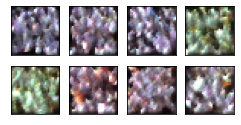

In [339]:
show_images(samples)

In [ ]:
# define sampling function for DDIM   
# removes the noise using ddim
def denoise_ddim(x, t, t_prev, pred_noise):
    ab = ab_t[t]
    ab_prev = ab_t[t_prev]
    
    x0_pred = ab_prev.sqrt() / ab.sqrt() * (x - (1 - ab).sqrt() * pred_noise)
    dir_xt = (1 - ab_prev).sqrt() * pred_noise

    return x0_pred + dir_xt

In [ ]:
# load in model weights and set to eval mode
nn_model.load_state_dict(torch.load(f"{save_dir}/model_31.pth", map_location=device))
nn_model.eval() 
print("Loaded in Model without context")

In [ ]:
# sample quickly using DDIM
@torch.no_grad()
def sample_ddim(n_sample, n=20):
    # x_T ~ N(0, 1), sample initial noise
    samples = torch.randn(n_sample, 3, height, height).to(device)  

    # array to keep track of generated steps for plotting
    intermediate = [] 
    step_size = timesteps // n
    for i in range(timesteps, 0, -step_size):
        print(f'sampling timestep {i:3d}', end='\r')

        # reshape time tensor
        t = torch.tensor([i / timesteps])[:, None, None, None].to(device)

        eps = nn_model(samples, t)    # predict noise e_(x_t,t)
        samples = denoise_ddim(samples, i, i - step_size, eps)
        intermediate.append(samples.detach().cpu().numpy())

    intermediate = np.stack(intermediate)
    return samples, intermediate

In [ ]:
# visualize samples
plt.clf()
samples, intermediate = sample_ddim(32, n=25)
animation_ddim = plot_sample(intermediate,32,4,save_dir, "ani_run", None, save=False)
HTML(animation_ddim.to_jshtml())